# Part 2 - Naive Bayes

<div class="alert-success">
Nama :Arif Su'admaji
</div>

<div class="alert-danger">
Github : https://github.com/arifsuadmaji
</div>

<div class="alert-warning">
Pengantar Data Mining
</div>

<div class="alert-info">
2023
</div

# Import Library

In [1]:
import numpy as np
import pandas as pd

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder

from sklearn.naive_bayes import GaussianNB

#for checking testing results
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

# Input Data

In [2]:
df = pd.read_csv('./Data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Check Missing Value

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Information of dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Handling Missing value Categorical dataset

In [5]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Train-Test Split

In [6]:
X = df.drop(columns='Outcome')
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((729, 8), (39, 8), (729,), (39,))

In [7]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

# Scaling

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Gaussian Model

In [9]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

# Evaluate model

In [10]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [11]:
print ('accuracy_score: ',accuracy_score(y_test,y_pred))

accuracy_score:  0.8717948717948718


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.75      0.82      0.78        11

    accuracy                           0.87        39
   macro avg       0.84      0.86      0.85        39
weighted avg       0.88      0.87      0.87        39



In [13]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[25,  3],
       [ 2,  9]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Model')

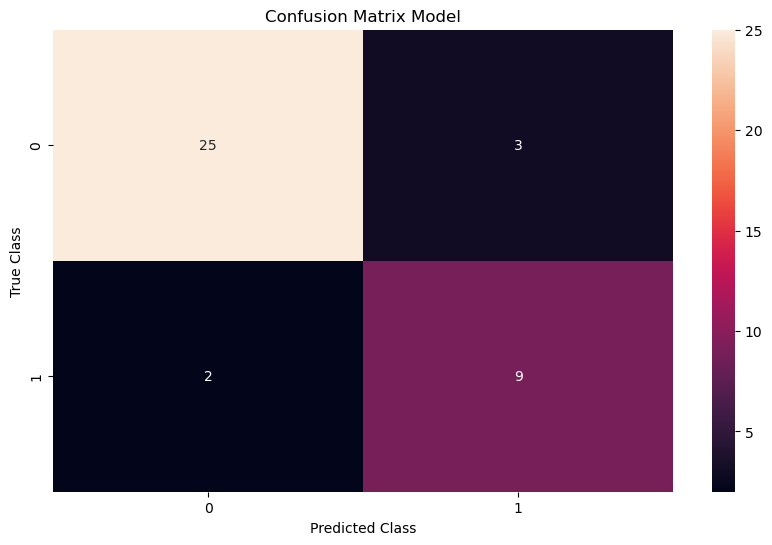

In [14]:
fig = plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, fmt = "d")

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model")